In [77]:
# in order to install the required packages for the snn conversion, 
# you need the following packages
# furthemore you must have installed miniconda or anaconda
# and activated a virtual environment to execute the following commands

# %conda install akida
# %conda install cnn2snn
# %conda install akida-models

In [78]:
# yolo
# imagenet
# cnn

model_name = "cnn"

In [79]:
import tensorflow as tf
import utils

In [80]:
ds_train, ds_train_info = utils.getDataset('train')
ds_test, ds_test_info = utils.getDataset('test')
ds_eval, ds_eval_info = utils.getDataset('validation')

In [ ]:
ds_train.

In [81]:
from tensorflow.keras.models import load_model
from akida_models import yolo_base
from tensorflow.keras.utils import get_file
from tensorflow.keras.layers import Dense, Flatten, Conv2D, ReLU, BatchNormalization
from tensorflow.keras import Sequential

In [82]:
model : Sequential = Sequential()

if(model_name == "yolo"):
    yolo_model = yolo_base()
    yolo_model.get_layer(index=-1)
    model.add(yolo_model)
    
elif(model_name == "imagenet"):
    
    model_file = get_file(
        "akidanet_imagenet_224_alpha_50.h5",
        "http://data.brainchip.com/models/akidanet/akidanet_imagenet_224_alpha_50.h5",
        cache_subdir='models/akidanet_imagenet')
    model.add(load_model(model_file))

elif(model_name == "cnn"):
    
    input_shapes = [
    (224,224,3),
    (224,224,64),
    (112,112,128),
    (56,56,256),
    (28,28,512),
    (14,14,1024),
    (7,7,2048),
    (7,7,4096),
    (4,)]

    for input_shape in input_shapes:
    
        model.add(Conv2D(2,7, input_shape=input_shape)) 
        model.add(BatchNormalization(input_shape=input_shape)) 
        model.add(ReLU(input_shape=input_shape))

model.add(Flatten())
model.add(Dense(4))

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_72 (Conv2D)          (None, 218, 218, 2)       296       
                                                                 
 batch_normalization_72 (Bat  (None, 218, 218, 2)      8         
 chNormalization)                                                
                                                                 
 re_lu_72 (ReLU)             (None, 218, 218, 2)       0         
                                                                 
 conv2d_73 (Conv2D)          (None, 212, 212, 2)       198       
                                                                 
 batch_normalization_73 (Bat  (None, 212, 212, 2)      8         
 chNormalization)                                                
                                                                 
 re_lu_73 (ReLU)             (None, 212, 212, 2)      

In [83]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.Huber(),#tf.keras.losses.MeanSquaredError(reduction="auto", name="mean_squared_error"), 
              metrics=['accuracy'])#[tf.keras.metrics.MeanIoU(num_classes=1)])


callbacks = [tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)]

In [84]:
model.fit(
    ds_train,
    epochs=50,
    validation_data=ds_test,
    callbacks=callbacks
)

Epoch 1/50
37/37 [==============================] - 10s 234ms/step - loss: 2.1728 - accuracy: 0.3304
Epoch 2/50
37/37 [==============================] - 6s 153ms/step - loss: 0.0979 - accuracy: 0.4025
Epoch 3/50
37/37 [==============================] - 6s 154ms/step - loss: 0.0223 - accuracy: 0.6003
Epoch 4/50
37/37 [==============================] - 6s 155ms/step - loss: 0.0188 - accuracy: 0.6074
Epoch 5/50
37/37 [==============================] - 6s 155ms/step - loss: 0.0199 - accuracy: 0.6130
Epoch 6/50
37/37 [==============================] - 6s 155ms/step - loss: 0.0206 - accuracy: 0.6219
Epoch 7/50
37/37 [==============================] - 6s 156ms/step - loss: 0.0194 - accuracy: 0.6295


In [85]:
results = model.evaluate(
  ds_eval
)

print("test loss, test acc:", results)

if(model_name == "imagenet"):
  model.save("models/imagenet_model")
elif(model_name == "yolo"):
  model.save("models/yolo_model")
elif(model_name == "cnn"):
  model.save("models/cnn_model")

9/9 [==============================] - 1s 97ms/step - loss: 0.0679 - accuracy: 0.2326
test loss, test acc: [0.06788180023431778, 0.23262031376361847]


INFO:tensorflow:Assets written to: models/cnn_model/assets


INFO:tensorflow:Assets written to: models/cnn_model/assets


In [ ]:
import numpy as np

if(model_name == "imagenet"):
  model = tf.keras.models.load_model("models/imagenet_model")
elif(model_name == "yolo"):
  model = tf.keras.models.load_model("models/yolo_model")
elif(model_name == "cnn"):
  model = tf.keras.models.load_model("models/cnn_model")

4/4 [==============================] - 0s 14ms/step


2023-03-16 12:46:22.522783: W tensorflow/core/kernels/image/draw_bounding_box_op.cc:143] Bounding box (39,13,71,6) is inverted and will not be drawn.
2023-03-16 12:46:22.522815: W tensorflow/core/kernels/image/draw_bounding_box_op.cc:143] Bounding box (45,13,70,8) is inverted and will not be drawn.
2023-03-16 12:46:22.522823: W tensorflow/core/kernels/image/draw_bounding_box_op.cc:143] Bounding box (36,12,62,10) is inverted and will not be drawn.
2023-03-16 12:46:22.522826: W tensorflow/core/kernels/image/draw_bounding_box_op.cc:143] Bounding box (32,12,59,10) is inverted and will not be drawn.
2023-03-16 12:46:22.522830: W tensorflow/core/kernels/image/draw_bounding_box_op.cc:143] Bounding box (37,13,73,-4) is inverted and will not be drawn.
2023-03-16 12:46:22.522833: W tensorflow/core/kernels/image/draw_bounding_box_op.cc:143] Bounding box (35,12,74,0) is inverted and will not be drawn.
2023-03-16 12:46:22.522837: W tensorflow/core/kernels/image/draw_bounding_box_op.cc:143] Bounding

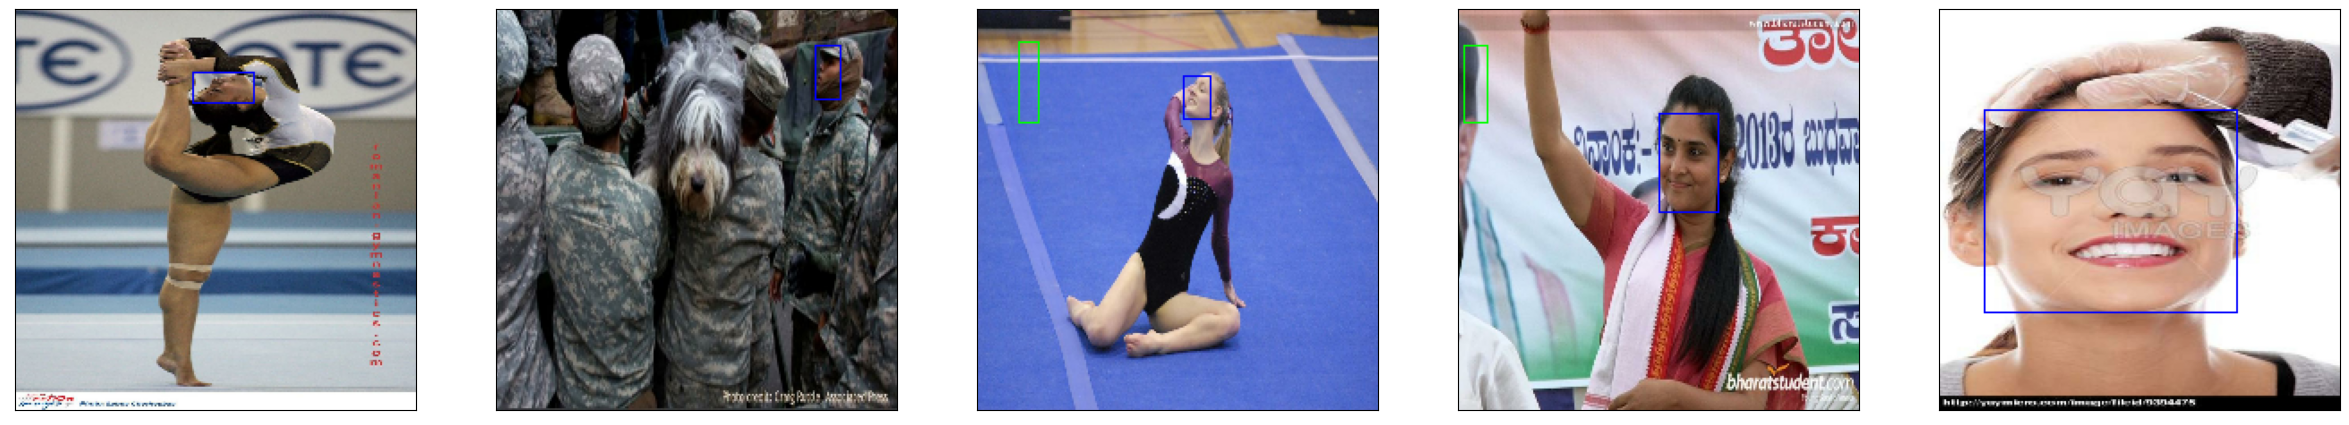

In [86]:
utils.predict(model=model, model_name=model_name, ds=ds_train)